<a href="https://colab.research.google.com/github/SevilAnna/UniversityClasses/blob/master/EM%C3%9C322%20Class/EMU322_HW2_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
from numpy import random
from numpy.random import Generator, PCG64
from scipy.stats import norm, expon, uniform
import matplotlib.pyplot as plt
import math
from sympy import sin, cos
print("DONE!")

DONE!


# **Question 1**

Generate 20000 normal random variables with mean  to be the sum of 5th digits of ID numbers of
all your group members and standard deviation  should be the sum of 7th digits of ID numbers of
all your group members. Using these numbers, find the estimated probability that a normal random
variable with the assumed  and assumed standard deviation  is less than or equal to x where x
can take the following values: x=-4, -3.5, -3-2.5-2, -1.5-, -0.5,
+0.5+, +1.5+2, +2.53, +3.5+4. Compare these estimated probabilities
with the exact ones. Comment on the results

mean: 7 	stDev: 8 

probability of the nrv being <= -25 	is: 0.0 	z-score: -4.0
probability of the nrv being <= -21.0 	is: 5e-05 	z-score: -3.5
probability of the nrv being <= -17 	is: 0.001 	z-score: -3.0
probability of the nrv being <= -13.0 	is: 0.0062 	z-score: -2.5
probability of the nrv being <= -9 	is: 0.02205 	z-score: -2.0
probability of the nrv being <= -5.0 	is: 0.06425 	z-score: -1.5
probability of the nrv being <= -1 	is: 0.15915 	z-score: -1.0
probability of the nrv being <= 3.0 	is: 0.3071 	z-score: -0.5
probability of the nrv being <= 7 	is: 0.5002 	z-score: 0.0
probability of the nrv being <= 11.0 	is: 0.69275 	z-score: 0.5
probability of the nrv being <= 15 	is: 0.84355 	z-score: 1.0
probability of the nrv being <= 19.0 	is: 0.9375 	z-score: 1.5
probability of the nrv being <= 23 	is: 0.98005 	z-score: 2.0
probability of the nrv being <= 27.0 	is: 0.9949 	z-score: 2.5
probability of the nrv being <= 31 	is: 0.99915 	z-score: 3.0
probability of the nrv being <= 35.0 	i

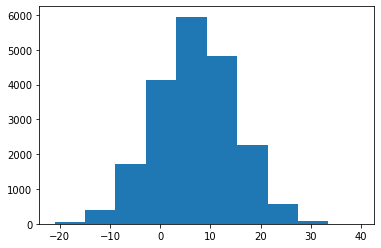

In [ ]:
ID_1, ID_2 = 21501405, 12345678   #my ID + dummy ID
ID_sum = str(ID_1 + ID_2)
m, s = int(ID_sum[4]), int(ID_sum[6])   # mean & stDev
print("mean:",m, "\tstDev:",s,"\n")     # m = 7 , s = 8
x_values = [m-4*s, m-3.5*s, m-3*s, m-2.5*s, m-2*s, m-1.5*s, m-s, m-0.5*s, m, 
            m+0.5*s, m+s, m+1.5*s, m+2*s, m+2.5*s, m+3*s, m+3.5*s, m+4*s]
N=np.random.normal(m,s, size=20000)
plt.hist(N)
for x in x_values:
  prob = 0
  for n in N:
    if n <= x:
      prob += 1
  prob = prob/20000
  z_score = (x-m)/s
  print("probability of the nrv being <=",x,"\tis:",prob,"\tz-score:",z_score)

In [ ]:
z_score = (x-m)/s

# **Question 2**

Recall that three line segments can form a triangle if the triangular inequalities hold for these three line segments. Use simulation to estimate the probability that three line segments (continuous) uniformly distributed over the interval [0, 6] form a triangle. Please, perform the simulation for n=20, 50, 100, 500, 1000 times and then estimate the probability for each case.

In [ ]:
points_n = [20,50,100,500,1000]
for n in points_n:
  prob = 0
  for i in range(n):
    line1 = np.random.uniform(0,6)
    line2 = np.random.uniform(0,6-line1)
    line3 = 6 - line1 - line2
    #print(line1,line2,line3,line1+line2+line3)
    #|a-b|<c<a+b
    if abs(line1-line2)<line3<(line1+line2):
      prob += 1
  print("probability of it forming a triangle for n =",n,"is:",prob/n)

probability of it forming a triangle for n = 20 is: 0.25
probability of it forming a triangle for n = 50 is: 0.36
probability of it forming a triangle for n = 100 is: 0.19
probability of it forming a triangle for n = 500 is: 0.184
probability of it forming a triangle for n = 1000 is: 0.177


# **Question 3**

A coin having probability p=0.60 of coming up heads is successively flipped until 3 of the most
recent 4 flips are heads. Let N denote the number of flips. Note that if the first 3 flips are heads,
N=3. Simulate the situation for n=20, 50, 100, 500, 1000 times to compute the expected value of
N.

In [ ]:
point_n=[20,50,100,500,1000]
for n in point_n:
  totalN = 0
  for i in range(n):
    total = 0
    firstflip = 0
    secondflip = 0
    thirdflip = 0
    lastflip = 0
    N = 0
    cont = True
    while cont == True:
      N += 1
      totalN += 1
      firstflip = secondflip
      secondflip = thirdflip
      thirdflip = lastflip
      flip = random.randint(100)
      if flip < 100:
        lastflip = 1
      #print(firstflip, secondflip, thirdflip, lastflip)
      total = firstflip + secondflip + thirdflip + lastflip
      if total >= 3:
        #print(N,totalN)
        cont = False
  print("for n =",n,"\tN =",int(totalN/n),"flips")

for n = 20 	N = 3 flips
for n = 50 	N = 3 flips
for n = 100 	N = 3 flips
for n = 500 	N = 3 flips
for n = 1000 	N = 3 flips


# **Question 4 using Riemann**       


Estimate the following integral by using Monte Carlo simulation. Please, implement both ways (probability based and Riemann sum based) to estimate the following integral. Please use  n=20,50,200,1000,5000,10000 points to estimate. Note that the argument is in radian. Comment on the results.              
> ∫ (𝑢=0to10)        5(𝑢 + sin 2𝑢 + cos 𝑢 + cos 2𝑢) d𝑢




In [ ]:
a, b = 0, 10
points_n = [20,50,200,1000,5000,10000]
for n in points_n:
  N=np.random.uniform(a,b, size=n)
  Yi_sum = 0
  for Xi in N:
    Yi = 5*(Xi+sin(2*Xi)+cos(Xi)+cos(2*Xi))
    #print(Yi)
    Yi_sum += Yi
    #print(n,"\tXi",Xi,"\tYi",Yi,"\tSum",Yi_sum)
  int_i = ((b-a)/n) * Yi_sum
  print("Integral for n =",n,"\tpoints is: ",int_i)

Integral for n = 20 	points is:  304.227457837207
Integral for n = 50 	points is:  237.235505192686
Integral for n = 200 	points is:  243.454647418212
Integral for n = 1000 	points is:  248.926047275739
Integral for n = 5000 	points is:  249.734483834126
Integral for n = 10000 	points is:  250.655317989548


# **Question 4 using prob** 

Estimate the following integral by using Monte Carlo simulation. Please, implement both ways (probability based and Riemann sum based) to estimate the following integral. Please use  n=20,50,200,1000,5000,10000 points to estimate. Note that the argument is in radian. Comment on the results.              
> ∫ (𝑢=0to10)        5(𝑢 + sin 2𝑢 + cos 𝑢 + cos 2𝑢) d𝑢




In [ ]:
x = 10
y = 5*(x + math.sin(2*x) + math.cos(x) + math.cos(2*x))
#print(y,"radians")
total_area = x*y
print(total_area)

524.0977891732284


In [ ]:
points_n = [20,50,200,1000,5000,10000]
for n in points_n:
  m = 0
  for j in range(n):
    xi = numpy_randomGen.uniform(0,x)
    yi = numpy_randomGen.uniform(0,y)
    y2 = (5*(xi + math.sin(2*xi) + math.cos(xi) + math.cos(2*xi)))
    #print(xi,yi,y2)
    if yi <= y2:
      m += 1
  #print(m,n)
  area = total_area * (m/n)
  print("integral for n=",n,"\tis:",area)

integral for n= 20 	is: 235.84400512795278
integral for n= 50 	is: 324.94062928740163
integral for n= 200 	is: 267.2898724783465
integral for n= 1000 	is: 251.56693880314964
integral for n= 5000 	is: 247.26933693192916
integral for n= 10000 	is: 249.2084987518701


#**Question 5**

In [ ]:
#seed = 568
#numpy_randomGen = Generator(PCG64(seed))

points_n1 = [1000,2000,3000,4000,5000]
points_n = random.randint(0,1,size=5)
for o in range(0,5):
  points_n[o] = points_n1[o]
#print(points_n)

B_list = [0,100,200,300,400,500,600,800]
F_mean_list = random.randint(0,1,size=5)
F_std_list = random.randint(0,1,size=5)

for n in points_n1:
  A=np.random.exponential(200, size=n)  #A
  #print(A)
  B=random.randint(0,1,size=n)
  for b in range(n):                          #B
    B1=random.randint(0,8)               
    B[b] = B_list[B1]
  #print(B1,"\n",B)
  C1=random.randint(0,100,size=n)             #C
  C=random.randint(0,1,size=n)
  for c in range(n):
    if C1[c] < 20:
      C[c] = 500
    elif C1[c] < 50:
      C[c] = 600
    elif C1[c] < 65:
      C[c] = 700
    else:
      C[c] = 800
  #print(C1,"\n",C)
  D=np.random.normal(100,400, size=n)   #D
  E=np.random.normal(100,400, size=n)   #E
  #print(D,"\n",E)
  F = (6*A*B+10*C)/(4*D*E)                    #F
  F_mean=np.mean(F)
  F_std=np.std(F)
  #print(F_mean,F_std)
  ind=points_n1.index(n)
  F_mean_list[ind] = F_mean
  F_std_list[ind] = F_std
print("n values:",points_n,"\nmean:",F_mean_list,"\nstDev:",F_std_list)

n values: [1000 2000 3000 4000 5000] 
mean: [  14   -1   28 -151    0] 
stDev: [  444   172  2141 10153   623]


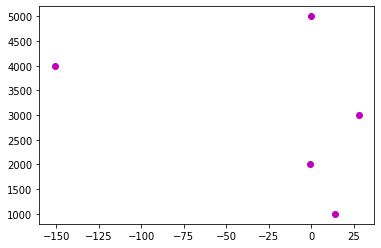

In [ ]:
fig,ax = plt.subplots(1)
ax.plot(F_mean_list,points_n,"mo")

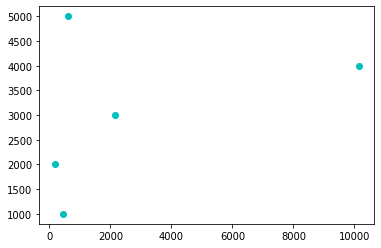

In [ ]:
fig2,ax = plt.subplots(1)
ax.plot(F_std_list,points_n,"co")

In [ ]:
print(max(F),min(F))

35300.57182198779 -14992.012757728704


(array([1.000e+00, 3.000e+00, 4.953e+03, 4.000e+01, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-14992.01275773,  -9962.75429976,  -4933.49584179,     95.76261619,
          5125.02107416,  10154.27953213,  15183.5379901 ,  20212.79644807,
         25242.05490604,  30271.31336402,  35300.57182199]),
 <a list of 10 Patch objects>)

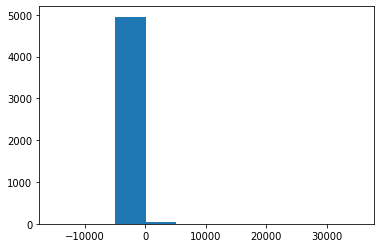

In [ ]:
plt.hist(F)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

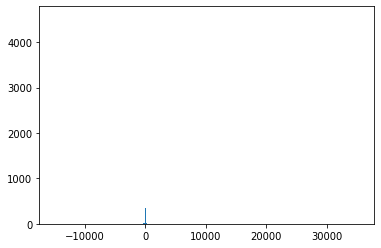

In [ ]:
w = 100
plt.hist(F, bins=np.arange(min(F), max(F) + w, w))

# **Question 6**

A baker is trying to figure out how many bagels to bake each day. The probability distribution of the number of bagel customers is as follows:       

> Number of customers per day: $\;\;\;\;\;\;$ 10 $\;\;\;$ 12 $\;\;\;$ 14 $\;\;\;\;$  16 $\;\;\;\;$ 18        
> Probability: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 0.20 $\;$ 0.10 $\;$ 0.30 $\;$ 0.25 $\;$ 0.15       

Each customer, independent of the others, order 12, 24, 36 or 48 bagels according to the following probability distribution:        

> Number of bagels: $\;\;\;\;\;\;$ 12 $\;\;\;\;$ 24 $\;\;\;$ 36 $\;\;\;\;$ 48        
> Probability: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 0.30 $\;$ 0.40 $\;$ 0.25 $\;$ 0.05           

Bagels sell for 1.4 TL per item. 6 bagels cost 5.4 TL to make. All bagels not sold at the end of the day are sold at half-price (0.7 TL per bagel) to a local grocery store. Based on 500 days of simulation, how many bagels should be baked each day? Try the following values: 216, 228, 240, 252, 264, 276, 288, 300.

In [ ]:
n_list = [216,228,240,252,265,276,288,300]
total_list = []
for n in n_list:
  total_earned = 0
  for days in range(500):
    made = n
    sold = 0
    customers = [10,12,14,16,18]
    c_prob_list = [20,30,60,85,100]
    c_prob = random.randint(0,100)
    #print("c_prob:",c_prob)
    x = True
    while x == True:
      for c in c_prob_list:
        if c_prob <= c and x == True:
          ind = c_prob_list.index(c)
          #print("c:",c,"ind:",ind)
          no_cust = customers[ind]
          x = False
    #print("no. of customers:",no_cust)
    for cust in range(no_cust):
      bagels = [12,24,36,48]
      b_prob_list = [30,70,95,100]
      b_prob = random.randint(0,100)
      y = True
      while y == True:
        for b in b_prob_list:
          if b_prob <= b and y == True:
            ind2 = b_prob_list.index(b)
            no_bagel = bagels[ind2]
            y = False
      #print(cust,"no. of bagels:",no_bagel)
      if made > sold + no_bagel:
        sold += no_bagel
    earned = sold*1.4
    earned_grocery = (made - sold)*0.7
    #print("made:",made,"sold:",sold,"earned:",earned,earned_grocery)
    total_earned += (earned + earned_grocery)    
  #print("for",n,"bagels we make:",total_earned/500,"TL/day on average")
  total_list.append(total_earned)
max_earned = max(total_list)
ind3 = total_list.index(max_earned)
for n in n_list:
  if n_list.index(n) == ind3:
    print("We should make",n,"bagels") 


We should make 300 bagels


# **Question 7**


A prisoner is trapped in a cell containing five doors. The first door leads to a tunnel which returns to his cell after three days of travel. The second leads to a tunnel which returns him to his cell after a single day of travel. The third door leads him immediately to freedom. The fourth door leads to a tunnel that will take him to freedom after two days of travel and the fifth door leads to a tunnel that will take him to the beginning of the tunnel of the second door after three days of travel. Assuming that the prisoner will always select doors 1, 2, 3, 4 and 5 with probabilities 0.25, 0.15, 0.1, 0.2 and 0.3 respectively, simulate the system for n=20, 50, 100, 500, 1000 times to compute the expected number and variance of days until the prisoner reaches freedom?

In [ ]:
points_n = [20,50,200,1000,5000,10000]
print("\t n\t\t E[X]\t\t V[X]")
print("\t---------------------------------------------------")
for n in points_n:
  total = []
  for i in range(n):
    freedom = False
    days = 0
    while freedom == False:
      prob = random.randint(0,100)
      if prob < 25:
        days += 3       # door 1
      elif prob < 40:
        days += 1       # door 2
      elif prob < 50:
        freedom = True  # door 3
      elif prob < 70:
        days += 2       # door 4
        freedom = True
      else:
        days += 4       # door 5
      #print(days)
    total.append(days)
    #print("days took:",days)
  
  print("\t",n,"\t\t",np.mean(total),"    \t",np.var(total))

	 n		 E[X]		 V[X]
	---------------------------------------------------
	 20 		 8.45     	 114.1475
	 50 		 8.02     	 63.2596
	 200 		 7.735     	 67.744775
	 1000 		 8.005     	 61.472975
	 5000 		 8.5058     	 76.18116635999999
	 10000 		 8.3812     	 76.62648656


# **Question 8**

A heart specialist schedules 16 patients each day, 1 every 30 minutes, starting at 9 A.M. Patients are expected to arrive for their appointments at the scheduled times. However, past experience shows that 10% of all patients arrive 15 minutes early, 25% arrive 5 minutes early, 50% arrive exactly on time, 10% arrive 10 minutes late, and 5% arrive 15 minutes late. The time the specialist spends with a patient varies, depending on the type of problem. Analysis of past data shows that the length of an appointment has the distribution in the following table. Simulate the system for 200 days to calculate the following performance measures:           
a. The probability that a patient will not wait in the queue.         
b. The probability that the last patient will not wait in the queue.       
c. The utilization of the specialist.       


> Length of appointment: $\;\;\;\;\;$ 24 $\;\;\;\;\;\;$ 27 $\;\;\;\;\;$ 30 $\;\;\;\;\;\;$ 33 $\;\;\;\;\;\;$ 36 $\;\;\;\;\;$ 39 $\;\;$ (minutes)      
> Probability: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 0.20 $\;\;\;$ 0.25 $\;\;\;$ 0.30 $\;\;\;$ 0.10 $\;\;\;$ 0.10 $\;\;\;$ 0.05


Note: You can assume that if a patient arrives early, the doctor will immediately start the examination if he is idle.

In [ ]:
n, patients = 2, 16
total_queue_prob = 0
last_patient_prob = 0
utilization = 0
for num in range(n):
  t_ser_begins = [0]*16
  t_ser_ends = [0]*16
  p_arr_times = [0]*16
  p_ser_times = [0]*16
  p_queue_times = [0]*16

  arr_time_list = [-15,-5,0,10,15] 
  arr_per_list = [10,35,85,95,100]
  ser_time_list = [24,27,30,33,36,39]
  ser_per_list = [20,45,75,85,95,100]

  for p in range(patients):
    arr_per = random.randint(0,100)
    x = True
    while x == True:
      for a in arr_per_list:
        if arr_per <= a and x == True:
          ind = arr_per_list.index(a)
          arr_time = arr_time_list[ind]
          x = False   
    len_prob = random.randint(0,100)
    y = True
    while y == True:
      for l in ser_per_list:
        if len_prob <= l and y == True:
          ind2 = ser_per_list.index(l)
          ser_time = ser_time_list[ind2]
          y = False

    # 9AM: 60min*9 = 540min
    arrived_at = 540 + p*30 + arr_time
    p_arr_times[p] = arrived_at
    p_ser_times[p] = ser_time

    if p == 0 and p_arr_times[p] <= 540:
      t_ser_begins[p] = 540
    elif p == 0 and p_arr_times[p] > 540:
      t_ser_begins[p] = p_arr_times[p]
    else:
      t_ser_begins[p] = max(t_ser_ends[p-1],p_arr_times[p])
      p_queue_times[p] = t_ser_begins[p] - p_arr_times[p]
      if p_queue_times[p] > 0:
        total_queue_prob += 1
        if p == 15:
          last_patient_prob += 1
    t_ser_ends[p] = t_ser_begins[p] + p_ser_times[p]

  utilization += sum(p_ser_times) / (t_ser_ends[15]-540)
  print()
  print("--------------\n",p_arr_times,"\n",p_ser_times,"\n")
  print(t_ser_begins,"\n",t_ser_ends,"\n",p_queue_times)

print("a. The probability a patient will not wait in queue is: ",
        1 - (total_queue_prob/(n*16)) )
print("b. Probability the last patient doesn't wait in queue: ",
        1 - (last_patient_prob/n) )
print("c. The utilization percentage of the specialist is: ",utilization/n)

--------------
 [540, 580, 595, 630, 675, 690, 720, 750, 780, 795, 840, 865, 900, 930, 955, 985] 
 [24, 24, 30, 36, 33, 27, 24, 30, 39, 36, 24, 33, 30, 30, 30, 30] 

[540, 580, 604, 634, 675, 708, 735, 759, 789, 828, 864, 888, 921, 951, 981, 1011] 
 [564, 604, 634, 670, 708, 735, 759, 789, 828, 864, 888, 921, 951, 981, 1011, 1041] 
 [0, 0, 9, 4, 0, 18, 15, 9, 9, 33, 24, 23, 21, 21, 26, 26]
--------------
 [525, 565, 595, 625, 660, 675, 720, 750, 780, 810, 840, 870, 900, 930, 945, 990] 
 [27, 30, 27, 30, 24, 27, 27, 33, 27, 24, 27, 30, 33, 27, 33, 27] 

[540, 567, 597, 625, 660, 684, 720, 750, 783, 810, 840, 870, 900, 933, 960, 993] 
 [567, 597, 624, 655, 684, 711, 747, 783, 810, 834, 867, 900, 933, 960, 993, 1020] 
 [0, 2, 2, 0, 0, 9, 0, 0, 3, 0, 0, 0, 0, 3, 15, 3]
a. The probability a patient will not wait in queue is:  0.375
b. Probability the last patient doesn't wait in queue:  0.0
c. The utilization percentage of the specialist is:  0.9509169161676647


# **Question 9**

A large car dealership employs a sales person where he works on commission, e.g. he is paid a percentage of profits from the cars that he sells. The dealership has three types of cars: luxury, midsize and compact. Data from past years show that the car sales per week and type of cars sold have the distributions given below. If the car sold is compact, the sales person is given a commission of 250 TL. For a midsize car, the commission is either 400 TL or 500 TL, depending on the model sold. On the midsize cars, a commission of 400 TL is paid out of 40% of the time and 500 TL is paid out the other 60% of the time. For a luxury car, commission is paid out according to three separate rates: 1000 TL with a probability of 35%, 1500 TL with a probability of 40%, and 2000 TL with a probability of 25%. For a van, commission is paid according to the following rates: 2000 TL with a probability of 40% and 3000 TL with a probability of 60%.


> \# of cars sold $\;\;$ Probability $\;\;\;\;\;\;\;\;$ $\;\;$ Type of car sold $\;\;$ $\;$ Probability           
> $\;\;$ $\;\;$ $\;\;$ 0 $\;\;$ $\;\;$ $\;\;$ $\;\;$ 0.10 $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ Compact $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ 0.45          
> $\;\;$ $\;\;$ $\;\;$ 1 $\;\;$ $\;\;$ $\;\;$ $\;\;$ 0.10 $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ Midsize $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;$ 0.30          
> $\;\;$ $\;\;$ $\;\;$ 2 $\;\;$ $\;\;$ $\;\;$ $\;\;$ 0.15 $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ Luxury $\;\;$ $\;\;\;\;\;\;$ $\;\;$ $\;\;$ $\;\;$ 0.10            
> $\;\;$ $\;\;$ $\;\;$ 3 $\;\;$ $\;\;$ $\;\;$ $\;\;$ 0.20 $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;$ Van $\;\;$ $\;\;$ $\;\;$ $\;\;$ $\;\;\;\;\;\;\;\;\;\;$  0.15             
> $\;\;$ $\;\;$ $\;\;$ 4 $\;\;$ $\;\;$ $\;\;$ $\;\;$ 0.20              
> $\;\;$ $\;\;$ $\;\;$ 5 $\;\;$ $\;\;$ $\;\;$ $\;\;$ 0.15             
> $\;\;$ $\;\;$ $\;\;$ 6 $\;\;$ $\;\;$ $\;\;$ $\;\;$ 0.10             

Simulate the system for 300 weeks to estimate the expected commission that a salesperson is paid in a week and compute the probability that the sales person earns a commission more than 10000 TL per week.







In [ ]:
import random
total_com = 0
counter = 0
for i in range(300):
    n_car = random.random()
    car_num = 0
    compact = 0
    midsize = 0
    luxury = 0
    van = 0
    no_sold_list = [0,1,2,3,4,5,6]
    prob_sold_list = [10,20,35,55,75,90,100]
    s_prob = random.randint(0,100)
    x = True
    while x == True:
      for s in prob_sold_list:
        if s_prob <= s and x == True:
          ind = prob_sold_list.index(s)
          #print("s:",s,"ind:",ind)
          car_num = no_sold_list[ind]
          x = False
    for i in range(car_num):
        a = random.random()
        if a < 0.45:
            compact += 1
        elif a < 0.75:
            midsize +=1
        elif a < 0.85:
            luxury += 1
        else:
            van += 1
    commission = 0
    while compact > 0:
        commission = commission + 250
        compact -= 1
    while midsize > 0:
        c = random.random()
        if c < 0.4:
            commission = commission + 400
        else:
            commission = commission + 500
        midsize -= 1
    while luxury > 0:
        c = random.random()
        if c < 0.35:
            commission = commission + 1000
        elif c < 0.75:
            commission = commission + 1500
        else:
            commission = commission + 2000
        luxury -= 1
    while van > 0:
        c = random.random()
        if c < 0.4:
            commission = commission + 2000
        elif c < 1:
            commission = commission + 3000
        van -= 1
    if commission > 10000:
        counter += 1
    total_com += commission
    #print(total_com)

print("expected commission per week is:",total_com/300)
print("P(X>10000)=",counter/300)

expected commission per week is: 2197.3333333333335
P(X>10000)= 0.0033333333333333335


# **Question 10**

A simplified model for the spread of a rumor goes this way: There are N=30 people in a group of friends, of which some have heard of the rumor and the others have not. During any single period of time, two persons are selected at random from the group and assumed to interact. If one of these persons has heard the rumor and the other has not, then with a probability 0.20, the rumor is transmitted. Assuming that this process begins at time t=0 with a single person knowing the rumor and the first interaction occurs at time t=1, simulate the system for 200 times to find the following quantities:       
a. Average time that it takes for everyone to hear the rumor.       
b. Probability that at least 20 people know the humor at time t=100.        
c. Probability that at most 4 people know the humor at time t=10.       
d. What happens to the above quantities in part a, b and c if the transmission probability increases to 0.30? Are the results intuitively expected?      
e. What happens to the above quantities in part a, b and c if the transmission probability decreases to 0.001? Are the results intuitively expected?       
f. What happens to the above quantities in part a, b and c if the transmission probability increases to 0.999? Are the results intuitively expected?       

In [ ]:
prob_list = [20,30,0.1,99.9]
for p in prob_list:
  total_t = 0
  prob_b = 0
  prob_c = 0
  for n in range(200):
    t=0
    N_list = [0]*30
    N_list[random.randint(0,30)] = 1
    #print(N_list)
    while t >= 0:
      t += 1
      person1 = random.randint(0,30)
      person2 = random.randint(0,30)
      while person1 == person2:
        person2 = random.randint(0,30)
      if N_list[person1] == 1:
        if N_list[person2] == 0:
          prob = np.random.uniform(0,100)
          if prob <= 20:
            N_list[person2] = 1
            #print("spread")
      if N_list[person2] == 1:
        if N_list[person1] == 0:
          prob = np.random.uniform(0,100)
          if prob <= p:
            N_list[person1] = 1
            #print("spread")
      #print("t=",t,N_list)
      transmitted = 0
      for i in N_list:
        if i == 1:
          transmitted += 1
        if transmitted == 30:
          total_t += t
          t = -1
      if t == 100 and transmitted >= 20:
        prob_b += 1
      if t == 10 and transmitted >= 4:
        prob_c += 1
      #print("# of ppl transmitted to (incl. first person):",transmitted)
  if p == 30:
    print("----------------\n\td:")
  elif p == 0.1:
    print("----------------\n\te:")
  elif p == 99.9:
    print("----------------\n\tf:")
  print("a. For p =",p/100," on average, everyone hears the rumor after",
          total_t/200,"interactions.")
  print("b. Prob of 20+ ppl hearing it by t=100 is:",prob_b/200)
  print("c. Prob of 4+  ppl hearing it by t=10  is:",prob_b/200)

a. For p = 0.2  on average, everyone hears the rumor after 571.985 interactions.
b. Prob of 20+ ppl hearing it by t=100 is: 0.0
c. Prob of 4+  ppl hearing it by t=10  is: 0.0
----------------
	d:
a. For p = 0.3  on average, everyone hears the rumor after 468.235 interactions.
b. Prob of 20+ ppl hearing it by t=100 is: 0.0
c. Prob of 4+  ppl hearing it by t=10  is: 0.0
----------------
	e:
a. For p = 0.001  on average, everyone hears the rumor after 1159.16 interactions.
b. Prob of 20+ ppl hearing it by t=100 is: 0.0
c. Prob of 4+  ppl hearing it by t=10  is: 0.0
----------------
	f:
a. For p = 0.9990000000000001  on average, everyone hears the rumor after 194.125 interactions.
b. Prob of 20+ ppl hearing it by t=100 is: 0.465
c. Prob of 4+  ppl hearing it by t=10  is: 0.465
